#Assignment 2


#  Data pre-processing


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
q1_data = pd.read_csv('Q1.csv')
q2_data = pd.read_csv('Q2.csv')

In [8]:
q1_data.head()

,type,difficulty,learned\_before,completeness,class: proper\_question
0,math,hard,yes,poor,no
1,chemistry,hard,no,good,no
2,language,hard,yes,good,yes
3,language,medium,no,poor,yes
4,math,easy,yes,poor,yes


# **Q1 (a)**



In [9]:
from sklearn import tree, preprocessing, metrics

In [10]:
q1_X = q1_data.iloc[:,:-1]
q1_Y = q1_data.iloc[:,-1]

q1_X_onehot = pd.get_dummies(q1_X[['type','difficulty','learned\_before', 'completeness']])

q1_X_train = q1_X_onehot.iloc[4:,:]
q1_X_test = q1_X_onehot.iloc[:4,:]

q1_Y_train = q1_Y[4:]
q1_Y_test = q1_Y[:4]

In [44]:
example = pd.get_dummies(q1_X[['type','difficulty']])
example

,type_chemistry,type_language,type_math,difficulty_easy,difficulty_hard,difficulty_medium
0,0,0,1,0,1,0
1,1,0,0,0,1,0
2,0,1,0,0,1,0
3,0,1,0,0,0,1
4,0,0,1,1,0,0
5,0,1,0,1,0,0
6,1,0,0,1,0,0
7,0,0,1,0,0,1
8,0,0,1,1,0,0
9,1,0,0,0,0,1


In [11]:
model_entropy = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 4, random_state=1)
model_entropy = model_entropy.fit(q1_X_train, q1_Y_train)

In [12]:
q1_X_onehot.columns

Index(['type_chemistry', 'type_language', 'type_math', 'difficulty_easy',
       'difficulty_hard', 'difficulty_medium', 'learned\_before_no',
       'learned\_before_yes', 'completeness_good', 'completeness_poor'],
      dtype='object')

[Text(0.6666666666666666, 0.875, 'type_chemistry <= 0.5\nentropy = 0.881\nsamples = 10\nvalue = [3, 7]\nclass = yes'),
 Text(0.5, 0.625, 'learned\\_before_no <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [3, 4]\nclass = yes'),
 Text(0.3333333333333333, 0.375, 'difficulty_medium <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = yes'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = yes'),
 Text(0.5, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = no'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = no'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = yes')]

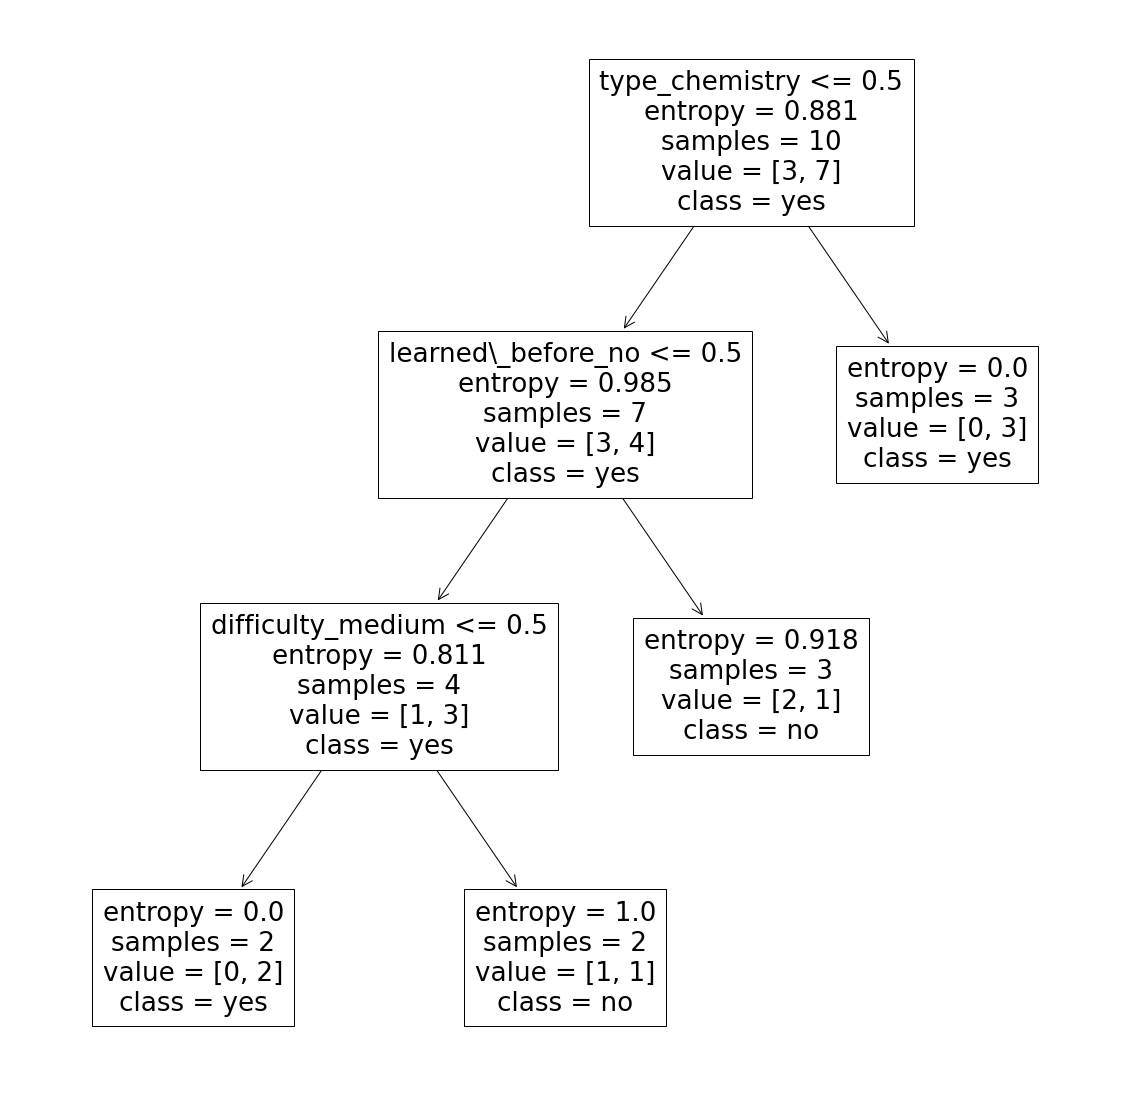

In [13]:
plt.figure(figsize = (20,20))
tree.plot_tree(model_entropy,feature_names= q1_X_onehot.columns, class_names = q1_Y.unique())

In [14]:
train_score = metrics.accuracy_score(y_true = q1_Y_train, y_pred = model_entropy.predict(q1_X_train))
test_score = metrics.accuracy_score(y_true = q1_Y_test, y_pred = model_entropy.predict(q1_X_test))

print(f'Training Accuracy:\t{train_score}\nTesting Accurcy:\t{test_score}')

Training Accuracy:	0.8
Testing Accurcy:	0.25


# **Q1 (b)**


In [15]:
min_sample_list = [i for i in range(2,10)]
training_accuracy = []
testing_accuracy = []

for i in min_sample_list:
  model = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_split = i, random_state=1)
  model = model.fit(q1_X_train, q1_Y_train)
  train_score = metrics.accuracy_score(y_true = q1_Y_train, y_pred = model.predict(q1_X_train))
  test_score = metrics.accuracy_score(y_true = q1_Y_test, y_pred = model.predict(q1_X_test))
  training_accuracy.append(train_score)
  testing_accuracy.append(test_score)

print(training_accuracy, testing_accuracy)

[0.9, 0.8, 0.8, 0.8, 0.8, 0.8, 0.7, 0.7] [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.5]


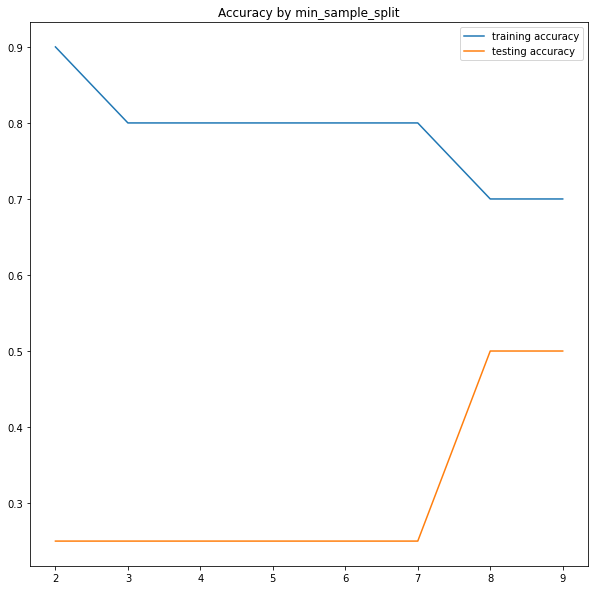

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (10,10))

ax.plot(min_sample_list, training_accuracy, label = 'training accuracy')
ax.plot(min_sample_list, testing_accuracy, label = 'testing accuracy')
ax.legend()
plt.title('Accuracy by min_sample_split')
plt.show()

# **Q1 (c)**

[Text(0.6666666666666666, 0.875, 'type_chemistry <= 0.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]\nclass = yes'),
 Text(0.5, 0.625, 'learned\\_before_no <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]\nclass = yes'),
 Text(0.3333333333333333, 0.375, 'difficulty_medium <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = yes'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = yes'),
 Text(0.5, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = no'),
 Text(0.6666666666666666, 0.375, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = no'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = yes')]

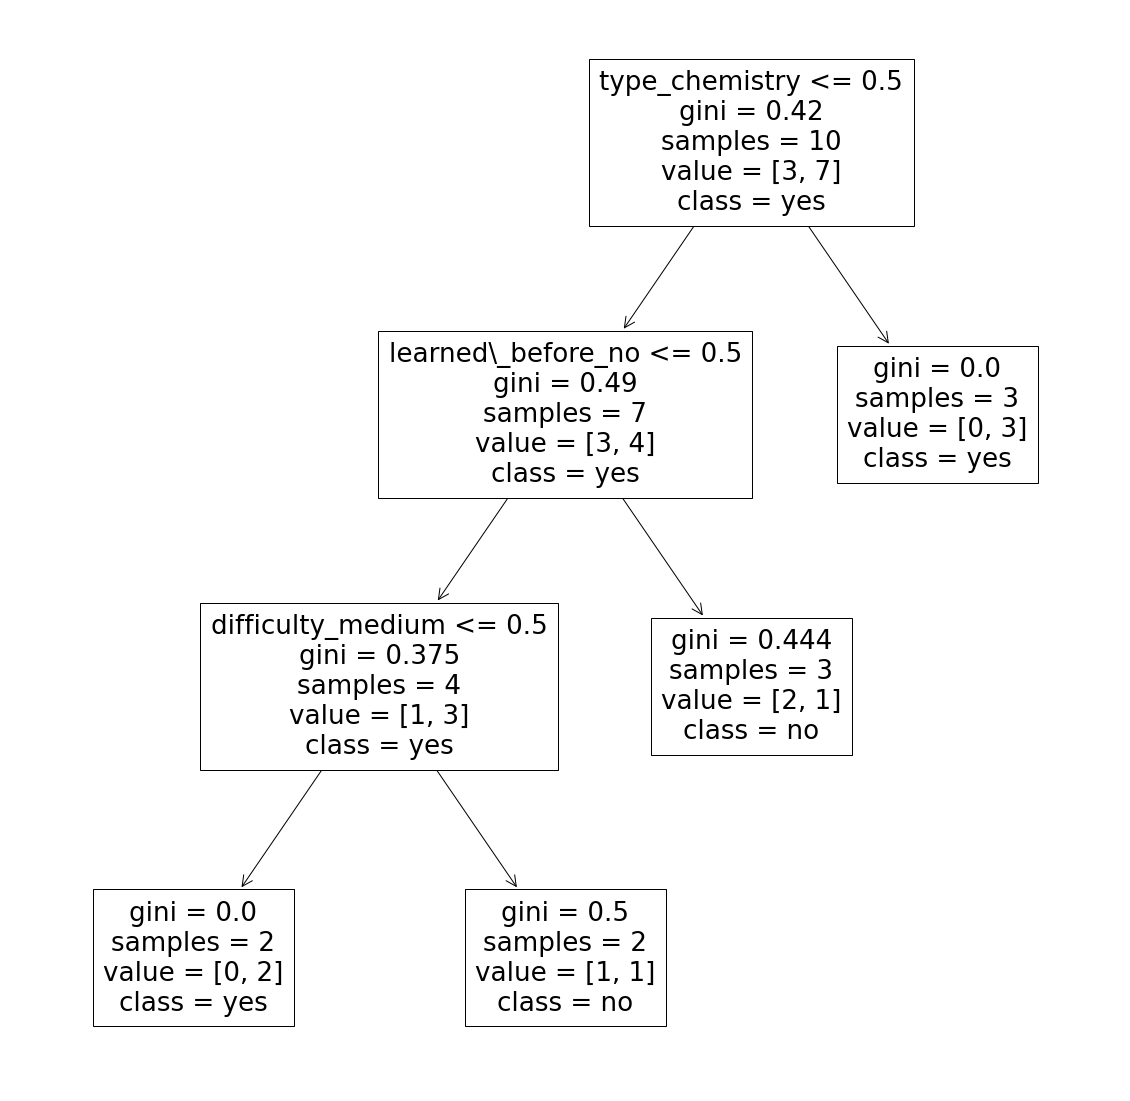

In [17]:
model_gini = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_split = 4, random_state=1)
model_gini = model_gini.fit(q1_X_train, q1_Y_train)

plt.figure(figsize = (20,20))
tree.plot_tree(model_gini,feature_names= q1_X_onehot.columns, class_names = q1_Y.unique())

In [18]:
train_score = metrics.accuracy_score(y_true = q1_Y_train, y_pred = model_gini.predict(q1_X_train))
test_score = metrics.accuracy_score(y_true = q1_Y_test, y_pred = model_gini.predict(q1_X_test))

print(f'Training Accuracy:\t{train_score}\nTesting Accurcy:\t{test_score}')

Training Accuracy:	0.8
Testing Accurcy:	0.25


# **Q1 (d)**

# **Q1 (e)**

# **Q1 (f)**

# **Q2 (a)**

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

In [20]:
from sklearn.model_selection import train_test_split
X_train_text, X_test_text, y_train, y_test = train_test_split(q2_data['text'], q2_data['sentiment'], random_state=1)

In [21]:
vec = CountVectorizer(stop_words = 'english', binary = True, ngram_range = (1,3))

X_train_text_vec = vec.fit_transform(X_train_text)
X_test_text_vec = vec.transform(X_test_text)

In [22]:
bnb = BernoulliNB(alpha = 0)
bnb = bnb.fit(X_train_text_vec, y_train)

train_score = metrics.accuracy_score(y_true = y_train, y_pred = bnb.predict(X_train_text_vec))
test_score = metrics.accuracy_score(y_true = y_test, y_pred = bnb.predict(X_test_text_vec))

print(f'Training Accuracy:\t{train_score}\nTesting Accurcy:\t{test_score}')

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


Training Accuracy:	1.0
Testing Accurcy:	0.82672


# **Q2 (b)**

In [45]:
q2_data['text'] = q2_data['text'].str.lower()

positive_df = q2_data[q2_data['sentiment'] == 0]

pos_review_num = positive_df.shape[0]
contain_excellent_pos = positive_df['text'].str.contains('excellent').sum()

print(f'# of positive labels: {pos_review_num}\t# of reviews containing excellent: {contain_excellent_pos}')
print(f'P(excellent|Positive): {contain_excellent_pos/pos_review_num}')

# of positive labels: 12500	# of reviews containing excellent: 1476
P(excellent|Positive): 0.11808


In [46]:
negative_df = q2_data[q2_data['sentiment'] == 1]

neg_review_num = negative_df.shape[0]
contain_excellent_neg = negative_df['text'].str.contains('excellent').sum()

print(f'# of negative labels: {neg_review_num}\t# of reviews containing excellent: {contain_excellent_neg}')
print(f'P(excellent|Negative): {contain_excellent_neg/neg_review_num}')

# of negative labels: 12500	# of reviews containing excellent: 352
P(excellent|Negative): 0.02816


In [48]:
contain_terrible_pos = positive_df['text'].str.contains('terrible').sum()
contain_terrible_neg = negative_df['text'].str.contains('terrible').sum()

print(f'# of positive labels: {pos_review_num}\t# of reviews containing terrible: {contain_terrible_pos}')
print(f'# of negative labels: {neg_review_num}\t# of reviews containing terrible: {contain_terrible_neg}\n')

print(f'P(terrible|Positive): {contain_terrible_pos/pos_review_num}')
print(f'P(terrible|Negative): {contain_terrible_neg/neg_review_num}')

# of positive labels: 12500	# of reviews containing terrible: 217
# of negative labels: 12500	# of reviews containing terrible: 1122

P(terrible|Positive): 0.01736
P(terrible|Negative): 0.08976
